In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post

In [55]:
source = pd.read_excel("../../../data_exploration/acl/tables/pos_text_types.xlsx")
source["Test Set"] = source["Test dataset"].apply(lambda x: "PUD" if x == "PUD" else "Other")

In [56]:
task = "pos"
metric = "Accuracy"

### Within Score

In [116]:
short_model_name = "mbert"

params = {
    "results_dir": "../../../results/",
    "experiment": "acl",
    "short_model_name": short_model_name,
    "task": task,
    "metric": metric
}

M = post.Metrics(**params)
df = M.within_score()
df["Within-Score"] *= 100

In [117]:
df = utils.merge_tables(df, source, how="left", cols_table2=["Test Set"])

In [118]:
df = df[df["Train-Language"] != "Algerian"]

In [103]:
G1 = df.loc[df["Test Set"] == "PUD", "Within-Score"].values
G2 = df.loc[df["Test Set"] == "Other", "Within-Score"].values

In [104]:
stats.levene(G1, G2)

LeveneResult(statistic=0.007549824422067037, pvalue=0.931989700800441)

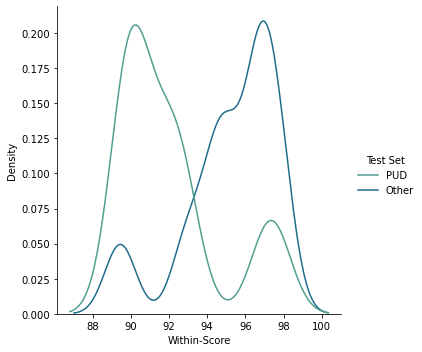

In [105]:
sns.displot(x="Within-Score", data=df, kind="kde", hue="Test Set", bw_adjust=0.5, palette="crest", common_norm=False)

In [106]:
stats.f_oneway(G1, G2)

F_onewayResult(statistic=5.38052154290387, pvalue=0.035986600777999034)

### Test-Dev Drop

In [107]:
summary = pd.read_excel("../../../fine_tuning/training_summary_acl_pos.xlsx")
summary = summary[summary["model_name"] == "bert-base-multilingual-cased"]

In [108]:
df = utils.merge_tables(df, summary, how="left", cols_table2=["dev_score"])

In [109]:
df["dev_score"] *= 100

In [110]:
df["Diff"] = df["dev_score"] - df["Within-Score"]

In [111]:
G1 = df.loc[df["Test Set"] == "PUD", "Diff"].values
G2 = df.loc[df["Test Set"] == "Other", "Diff"].values

In [112]:
stats.levene(G1, G2)

LeveneResult(statistic=11.031264497015577, pvalue=0.005043575298145538)

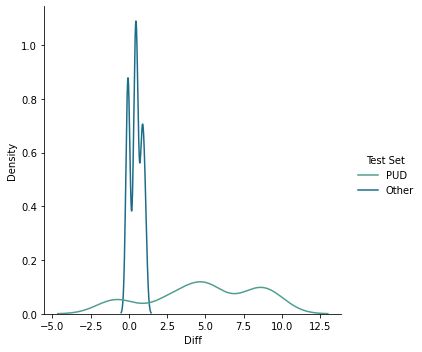

In [113]:
sns.displot(x="Diff", data=df, kind="kde", hue="Test Set", bw_adjust=0.5, palette="crest", common_norm=False)

In [114]:
stats.f_oneway(G1, G2)

F_onewayResult(statistic=15.156470206595975, pvalue=0.0016235586689585793)

### Transfer Loss

In [161]:
short_model_name = "xlm-roberta"

params = {
    "results_dir": "../../../results/",
    "experiment": "acl",
    "short_model_name": short_model_name,
    "task": task,
    "metric": metric
}

M = post.Metrics(**params)
df = M.transfer_loss()
df["Transfer-Loss"] *= 100

In [162]:
df = utils.merge_tables(df, source, how="left", cols_table2=["Test Set"])

In [163]:
df = df[df["Train-Language"] != "Algerian"]

In [164]:
G1 = df.loc[df["Test Set"] == "PUD", "Transfer-Loss"].values
G2 = df.loc[df["Test Set"] == "Other", "Transfer-Loss"].values

In [165]:
stats.levene(G1, G2)

LeveneResult(statistic=1.5549752692048355, pvalue=0.21342268392574154)

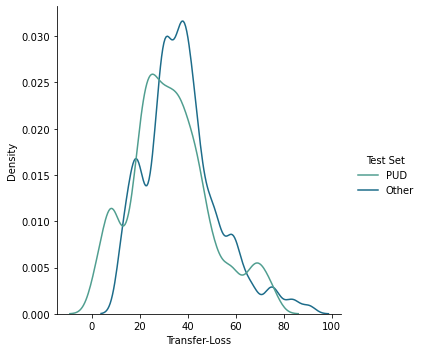

In [166]:
sns.displot(x="Transfer-Loss", data=df, kind="kde", hue="Test Set", bw_adjust=0.5, palette="crest", common_norm=False)

In [167]:
stats.f_oneway(G1, G2)

F_onewayResult(statistic=6.133386228741542, pvalue=0.013843720980101363)